## References : https://www.kaggle.com/jneupane12/analysis-of-movielens-dataset-beginner-sanalysis

# Import Libraries

In [1]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library

# 1. Import Three Data Sets

## 1.1 Importing Movies Data

In [2]:
df1 = pd.read_csv("movies.dat" , sep = "::", names = ["MovieID", "Title","Genres"])

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df1.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
#number of unique movies
movies = df1['MovieID'].unique().tolist()
len(movies)

3883

In [6]:
df1.shape

(3883, 3)

In [7]:
df1.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


## 1.2 Importing Second Data Set :Ratings .dat

In [10]:
df2 = pd.read_csv("ratings.dat" , sep = "::",names = ["UserID", "MovieID","Rating","Timestamp"])
df2.head()

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
df2.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [13]:
df2.shape

(1000209, 4)

In [14]:
#minimum rating given to a movie
df2['Rating'].min() 

1

In [15]:
df2['Rating'].max() 

5

# 1.3 Importing Third Data Set : Users.Dat

In [17]:
df3 = pd.read_csv("users.dat" , sep = "::",names = ["UserID", "Gender","Age","Occupation","Zip-code"])
df3.head()

C:\Users\thyagaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [19]:
df3.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


# 2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

### 2.1  Merging  two tables movies data (df1)  and rating data (df2) to form new table data1 with MovieID as a Primary Key

In [54]:
# Merging movies data (df1)  and rating data (df2)
data1 = pd.merge(df1,df2,on = 'MovieID', how = 'inner')
data1.head(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703


### 2.2 Merging two tables data1 and users data (df3) with UserID as a Primary Key

In [21]:
# Merging df3 (users data ) with data1 (merged form of df1 (movies data ) and df2(ratings data))
Master_Data1 = pd.merge(data1,df3,on = 'UserID', how = 'inner')
Master_Data1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


### 2.3 Creation of Master Data by Dropping Gneres , TimeStamp and Zip Code

In [23]:

# 'MovieID','Title','UserID','Age','Gender','Occupation','Rating'
Master_Data = Master_Data1.drop(['Genres','Timestamp','Zip-code'],axis=1)
Master_Data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


# 3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
### 3.1 User Age Distribution
### 3.2 User rating of the movie “Toy Story”
### 3.3 Top 25 movies by viewership rating
### 3.4 Find the ratings for all the movies reviewed by for a particular user of user id = 2696

## 3.1 User age distributions 


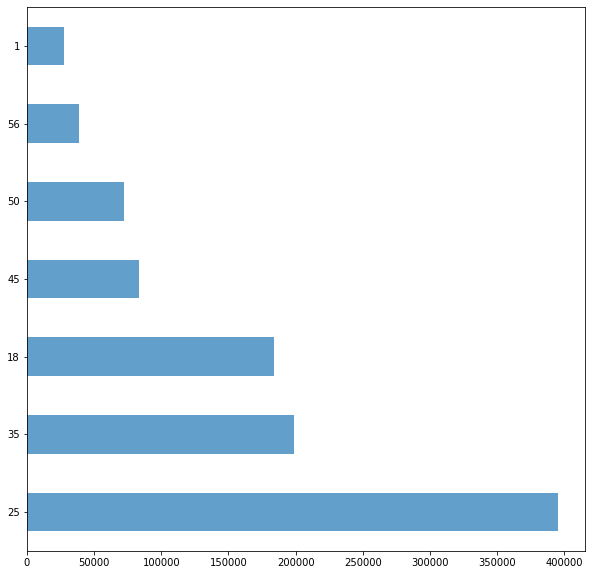

In [25]:
#Visualize user age distribution
Master_Data['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

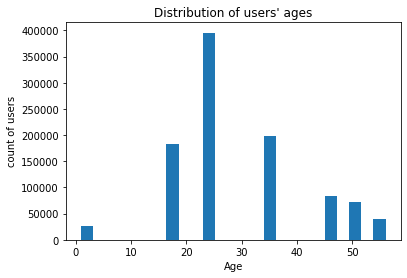

In [27]:
Master_Data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [29]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
Master_Data['age_group'] = pd.cut(Master_Data.Age, range(0, 81, 10), right=False, labels=labels)
Master_Data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1,0-9
53,50,50-59
124,25,20-29
369,35,30-39
770,18,10-19
2778,45,40-49
5001,56,50-59


## 3.2  User rating of the movie "Toy Story"


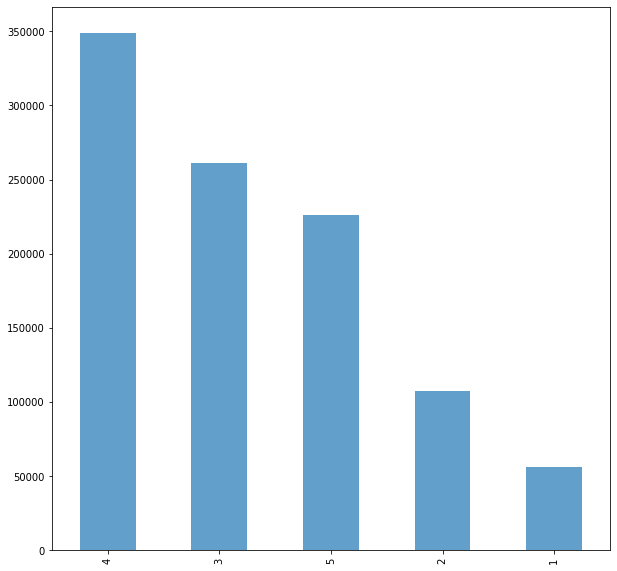

In [45]:
#Visualize overall rating by users
Master_Data['Rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [46]:
groupedby_movieName = Master_Data.groupby('Title')
groupedby_rating = Master_Data.groupby('Rating')
groupedby_uid = Master_Data.groupby('UserID')
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [36]:
movies = Master_Data.groupby('Title').size().sort_values(ascending=True)[:1000]
print(movies)

Title
Another Man's Poison (1952)                                               1
Night Tide (1961)                                                         1
Shadows (Cienie) (1988)                                                   1
McCullochs, The (1975)                                                    1
Anna (1996)                                                               1
Target (1995)                                                             1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)     1
Tashunga (1995)                                                           1
Waltzes from Vienna (1933)                                                1
Open Season (1996)                                                        1
I Don't Want to Talk About It (De eso no se habla) (1993)                 1
Jar, The (Khomreh) (1992)                                                 1
Waiting Game, The (2000)                                                  1
Voyage

In [55]:
ToyStory_data = groupedby_movieName.get_group('Toy Story (1995)')
ToyStory_data.shape

(2077, 8)

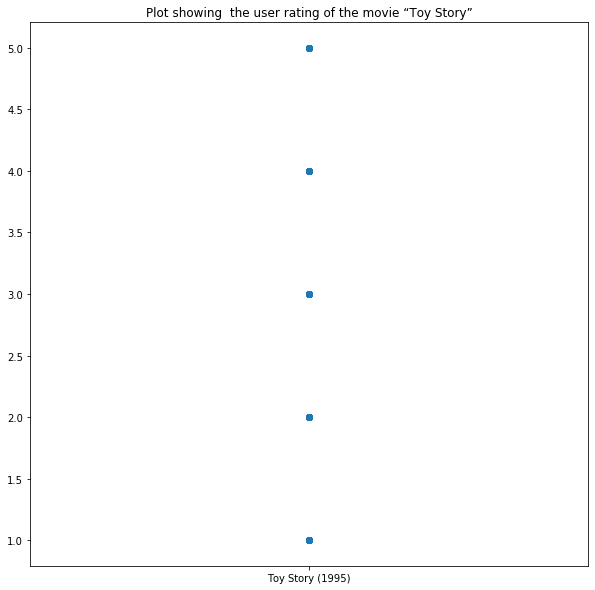

In [56]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['Title'],ToyStory_data['Rating'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

In [59]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['Title','age_group']].head()

,Title,age_group
0,Toy Story (1995),0-9
53,Toy Story (1995),50-59
124,Toy Story (1995),20-29
263,Toy Story (1995),20-29
369,Toy Story (1995),30-39


###  Top 25 movies by viewership rating 

In [55]:
# Top 25 movies by viewership rating 

high_rated = Master_Data.groupby('Title').size().sort_values(ascending= False)[:25]
[high_rated]

[Title
 American Beauty (1999)                                   3428
 Star Wars: Episode IV - A New Hope (1977)                2991
 Star Wars: Episode V - The Empire Strikes Back (1980)    2990
 Star Wars: Episode VI - Return of the Jedi (1983)        2883
 Jurassic Park (1993)                                     2672
 Saving Private Ryan (1998)                               2653
 Terminator 2: Judgment Day (1991)                        2649
 Matrix, The (1999)                                       2590
 Back to the Future (1985)                                2583
 Silence of the Lambs, The (1991)                         2578
 Men in Black (1997)                                      2538
 Raiders of the Lost Ark (1981)                           2514
 Fargo (1996)                                             2513
 Sixth Sense, The (1999)                                  2459
 Braveheart (1995)                                        2443
 Shakespeare in Love (1998)                     

In [51]:
Master_Data.Title.value_counts()[:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

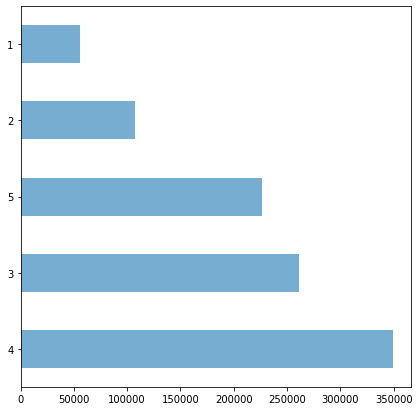

In [60]:
#Find and visualize the top 25 movies by viewership rating
top_25 = Master_Data[25:]
top_25['Rating'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

### Which movies are highly rated 

In [53]:
movie_stats = Master_Data.groupby('Title').agg({'Rating': [np.size, np.mean]})
movie_stats.head()

Rating          
                                size      mean
Title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

# Find the ratings for all the movies reviewed by for a particular user of user id =2696


In [62]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Rating']]

,UserID,Rating
991035,2696,3
991036,2696,5
991037,2696,4
991038,2696,3
991039,2696,4
991040,2696,2
991041,2696,3
991042,2696,4
991043,2696,4
991044,2696,2


# 4. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres) Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [66]:
df1.head(2)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [68]:
genre_list = df1['Genres']

In [69]:
genre_list

0          Animation|Children's|Comedy
1         Adventure|Children's|Fantasy
2                       Comedy|Romance
3                         Comedy|Drama
4                               Comedy
5                Action|Crime|Thriller
6                       Comedy|Romance
7                 Adventure|Children's
8                               Action
9            Action|Adventure|Thriller
10                Comedy|Drama|Romance
11                       Comedy|Horror
12                Animation|Children's
13                               Drama
14            Action|Adventure|Romance
15                      Drama|Thriller
16                       Drama|Romance
17                            Thriller
18                              Comedy
19                              Action
20                 Action|Comedy|Drama
21                Crime|Drama|Thriller
22                            Thriller
23                        Drama|Sci-Fi
24                       Drama|Romance
25                       

In [70]:
#total number of unique movie genre
unique_genre=df1['Genres'].unique().tolist()
len(unique_genre)

301

In [73]:
unique_genre[0:10]

["Animation|Children's|Comedy",
 "Adventure|Children's|Fantasy",
 'Comedy|Romance',
 'Comedy|Drama',
 'Comedy',
 'Action|Crime|Thriller',
 "Adventure|Children's",
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Drama|Romance']

In [75]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
X

[['Male', 1], ['Female', 3], ['Female', 2]]

## 5. Determine the features affecting the ratings of any particular movie. Develop an appropriate model to predict the movie ratings Dataset Description :

## 6 Develop an appropriate model to predict the movie ratings Dataset Description :

In [ ]:
# References
https://www.kaggle.com/sherinclaudia/movie-rating-prediction/notebook
https://www.kaggle.com/srinag/movielens-rating-prediction-modeling